In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015 = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              3936 non-null   int64  
 1   pohlavi_kod             3936 non-null   int64  
 2   je_cech                 3936 non-null   int64  
 3   datum_zahajeni          3936 non-null   int64  
 4   rok_maturity            3936 non-null   int64  
 5   maturita_nastup_rozdil  3936 non-null   int64  
 6   gymnazium               3936 non-null   int64  
 7   praha                   3936 non-null   int64  
 8   scio                    3936 non-null   int64  
 9   olym                    3936 non-null   int64  
 10  zkouska                 3936 non-null   int64  
 11  prominuti               3936 non-null   int64  
 12  dostudoval_uspesne      3936 non-null   int64  
 13  BI-PA1                  3866 non-null   float64
 14  BI-PAI                  3867 non-null   

In [4]:
matrix_bak_2015.mean()

studium_id                1.450497e+07
pohlavi_kod               1.257622e-01
je_cech                   7.731199e-01
datum_zahajeni            2.017119e+03
rok_maturity              2.016279e+03
maturita_nastup_rozdil    8.394309e-01
gymnazium                 5.406504e-01
praha                     5.005081e-02
scio                      7.190041e-02
olym                      7.545732e-02
zkouska                   2.870935e-02
prominuti                 2.159553e-02
dostudoval_uspesne        2.113821e-01
BI-PA1                    3.204346e+00
BI-PAI                    2.759633e+00
BI-CAO                    2.005299e+00
BI-PS1                    3.077132e+00
BI-MLO                    3.005815e+00
BI-ZMA                    3.218612e+00
BI-PA2                    2.979326e+00
BI-DBS                    2.557846e+00
BI-SAP                    2.467303e+00
BI-LIN                    3.258693e+00
BI-AG1                    2.849306e+00
BI-AAG                    2.813123e+00
BI-ZDM                   

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak_2015 = matrix_bak_2015.set_index(['studium_id'])

### Odstranění příznaků

In [6]:
matrix_bak_2015 = matrix_bak_2015.drop(columns=['BI-DPR', 'pohlavi_kod', 'je_cech', 
                                                'prominuti', 'zkouska', 'olym', 
                                               'scio', 'praha', 'gymnazium', 'datum_zahajeni', 'rok_maturity'])

### Přidání příznaků

In [7]:
matrix_bak_2015['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].mean(axis=1)

In [8]:
matrix_bak_2015.mean()

maturita_nastup_rozdil    0.839431
dostudoval_uspesne        0.211382
BI-PA1                    3.204346
BI-PAI                    2.759633
BI-CAO                    2.005299
BI-PS1                    3.077132
BI-MLO                    3.005815
BI-ZMA                    3.218612
BI-PA2                    2.979326
BI-DBS                    2.557846
BI-SAP                    2.467303
BI-LIN                    3.258693
BI-AG1                    2.849306
BI-AAG                    2.813123
BI-ZDM                    2.907979
BI-OSY                    2.721917
BI-PSI                    2.631344
BI-BEZ                    2.526510
BI-PST                    2.379116
BI-SI1.2                  2.217652
BI-EMP                    1.822159
prumer                    3.061951
dtype: float64

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_bak_2015 = pd.DataFrame(imputer.fit_transform(matrix_bak_2015), index=matrix_bak_2015.index, columns=matrix_bak_2015.columns)

In [10]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   maturita_nastup_rozdil  3936 non-null   float64
 1   dostudoval_uspesne      3936 non-null   float64
 2   BI-PA1                  3936 non-null   float64
 3   BI-PAI                  3936 non-null   float64
 4   BI-CAO                  3936 non-null   float64
 5   BI-PS1                  3936 non-null   float64
 6   BI-MLO                  3936 non-null   float64
 7   BI-ZMA                  3936 non-null   float64
 8   BI-PA2                  3936 non-null   float64
 9   BI-DBS                  3936 non-null   float64
 10  BI-SAP                  3936 non-null   float64
 11  BI-LIN                  3936 non-null   float64
 12  BI-AG1                  3936 non-null   float64
 13  BI-AAG                  3936 non-null   float64
 14  BI-ZDM                  3936 

#### Zaokrouhlení doplněných hodnot

In [11]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [12]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [13]:
matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [14]:
matrix_bak_2015

maturita_nastup_rozdil  dostudoval_uspesne  BI-PA1  BI-PAI  \
studium_id                                                               
12375406                       6.0                 1.0     2.5     2.0   
11736906                       6.0                 0.0     4.0     4.0   
12032306                       8.0                 0.0     4.0     4.0   
15613006                       9.0                 0.0     1.0     2.5   
12948006                       6.0                 1.0     3.0     2.0   
11703806                       5.0                 0.0     1.0     2.5   
12967806                       6.0                 1.0     1.0     2.5   
11738606                       5.0                 0.0     1.0     1.0   
11719706                       5.0                 1.0     1.0     2.5   
11675306                       5.0                 0.0     4.0     4.0   
12987806                       6.0                 0.0     2.5     2.5   
11743906                       5.0                 0.0     2.5     2.5   
13016006                       6.0                 1.0     1.0     3.0   
12036006                       5.0                 0.0     2.5     4.0   
13512306                       5.0                 0.0     4.0     2.0   
12987706                       6.0                 0.0     1.5     1.5   
11678106                       5.0                 0.0     1.5     1.5   
13518506                       5.0                 1.0     1.5     2.0   
14256606                       6.0                 1.0     1.0     2.5   
11727206                       4.0                 1.0     1.0     2.5   
11736306                       4.0                 0.0     1.5     2.0   
12967906                       5.0                 0.0     1.5     2.0   
11703506                       4.0                 0.0     1.5     1.5   
13010106                       5.0                 0.0     2.5     2.0   
14800306                       6.0                 0.0     2.5     2.0   
11744706                       4.0                 0.0     4.0     2.5   
11696406                       5.0                 0.0     4.0     2.5   
12973406                       5.0                 1.0     2.5     2.5   
11737806                       4.0                 0.0     4.0     4.0   
12035506                       4.0                 0.0     2.0     2.5   
13512006                       5.0                 1.0     1.0     1.5   
12964406                       5.0                 0.0     2.0     2.0   
12994106                       5.0                 1.0     2.0     2.5   
11742506                       4.0                 1.0     2.0     2.0   
11712706                       4.0                 0.0     1.0     1.0   
13518806                       5.0                 0.0     1.0     1.5   
11735606                       4.0                 0.0     2.0     3.0   
13518606                       5.0                 1.0     2.0     2.5   
15586306                       7.0                 1.0     2.5     1.5   
13519806                       5.0                 0.0     2.5     1.5   
11686106                       3.0                 1.0     2.5     2.5   
11692606                       3.0                 0.0     4.0     4.0   
13013306                       4.0                 1.0     1.5     1.5   
11713906                       3.0                 0.0     1.5     3.0   
12978506                       4.0                 1.0     2.0     2.5   
14283706                       5.0                 1.0     2.0     2.0   
11736706                       3.0                 0.0     2.5     2.5   
11676006                       3.0                 0.0     2.5     2.5   
12033706                       3.0                 1.0     1.5     2.0   
12964506                       4.0                 0.0     2.0     2.0   
16724706                       7.0                 0.0     2.5     1.5   
12954706                       4.0                 0.0     2.5     3.0   
12034706        

### Pomocné promenné

In [15]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = []
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [16]:
means = {'BI-PA1':3, 'BI-PAI':3, 'BI-CAO':2, 'BI-PS1':3, 'BI-MLO':3, 'BI-ZMA':3,
        'BI-PA2':3, 'BI-DBS':2.5, 'BI-SAP':2.5, 'BI-LIN':3,
        'BI-AAG':3, 'BI-ZDM':3, 'BI-AG1':3,
        'BI-OSY':2.5, 'BI-PSI':2.5, 'BI-BEZ':2.5,
        'BI-PST':2,
        'BI-SI1.2':2, 'BI-EMP':2
        }

prumer_mean = 3

### Nastavení atributů na kategorické - ordinální

In [17]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# BI-PA1
matrix_bak_2015['BI-PA1'] = matrix_bak_2015['BI-PA1'].astype(grades_category)
# BI-PAI
matrix_bak_2015['BI-PAI'] = matrix_bak_2015['BI-PAI'].astype(grades_category)
# BI-CAO
matrix_bak_2015['BI-CAO'] = matrix_bak_2015['BI-CAO'].astype(grades_category)
# BI-PS1
matrix_bak_2015['BI-PS1'] = matrix_bak_2015['BI-PS1'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-MLO'] = matrix_bak_2015['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix_bak_2015['BI-ZMA'] = matrix_bak_2015['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix_bak_2015['BI-PA2'] = matrix_bak_2015['BI-PA2'].astype(grades_category)
# BI-DBS
matrix_bak_2015['BI-DBS'] = matrix_bak_2015['BI-DBS'].astype(grades_category)
# BI-SAP
matrix_bak_2015['BI-SAP'] = matrix_bak_2015['BI-SAP'].astype(grades_category)
# BI-LIN
matrix_bak_2015['BI-LIN'] = matrix_bak_2015['BI-LIN'].astype(grades_category)
# BI-AG1
matrix_bak_2015['BI-AG1'] = matrix_bak_2015['BI-AG1'].astype(grades_category)
# BI-AAG
matrix_bak_2015['BI-AAG'] = matrix_bak_2015['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix_bak_2015['BI-ZDM'] = matrix_bak_2015['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix_bak_2015['BI-OSY'] = matrix_bak_2015['BI-OSY'].astype(grades_category)
# BI-PSI
matrix_bak_2015['BI-PSI'] = matrix_bak_2015['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix_bak_2015['BI-BEZ'] = matrix_bak_2015['BI-BEZ'].astype(grades_category)
# BI-PST
matrix_bak_2015['BI-PST'] = matrix_bak_2015['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix_bak_2015['BI-SI1.2'] = matrix_bak_2015['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-EMP'] = matrix_bak_2015['BI-EMP'].astype(grades_category)

In [18]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   maturita_nastup_rozdil  3936 non-null   float64 
 1   dostudoval_uspesne      3936 non-null   float64 
 2   BI-PA1                  3936 non-null   category
 3   BI-PAI                  3936 non-null   category
 4   BI-CAO                  3936 non-null   category
 5   BI-PS1                  3936 non-null   category
 6   BI-MLO                  3936 non-null   category
 7   BI-ZMA                  3936 non-null   category
 8   BI-PA2                  3936 non-null   category
 9   BI-DBS                  3936 non-null   category
 10  BI-SAP                  3936 non-null   category
 11  BI-LIN                  3936 non-null   category
 12  BI-AG1                  3936 non-null   category
 13  BI-AAG                  3936 non-null   category
 14  BI-ZDM       

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [19]:
Xdata = matrix_bak_2015.drop(columns='dostudoval_uspesne')
ydata = matrix_bak_2015.dostudoval_uspesne

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(3936, 21)

(3936,)

trénovací data


(3148, 21)

(3148,)

testovací data


(788, 21)

(788,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [21]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [22]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [23]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}

0.898290 (+/-0.032062) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.915882 (+/-0.039518) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.945735 (+/-0.024825) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.947562 (+/-0.019522) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.948100 (+/-0.022061) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.913133 (+/-0.024848) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.942424 (+/-0.026656) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.946226 (+/-0.016611) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.945603 (+/-0.016796) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.945355 (+/-0.016901) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [24]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.980940
accuracy score (test): 0.977157


In [25]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
20                  prumer            0.791366
14                  BI-OSY            0.062078
13                  BI-ZDM            0.057634
11                  BI-AG1            0.035769
17                  BI-PST            0.021159
10                  BI-LIN            0.016085
0   maturita_nastup_rozdil            0.014127
19                  BI-EMP            0.001783
6                   BI-ZMA            0.000000
7                   BI-PA2            0.000000
8                   BI-DBS            0.000000
9                   BI-SAP            0.000000
1                   BI-PA1            0.000000
5                   BI-MLO            0.000000
12                  BI-AAG            0.000000
4                   BI-PS1            0.000000
3                   BI-CAO            0.000000
15                  BI-PSI            0.000000
16                  BI-BEZ            0.000000
2                   BI-PAI            0.000000
18                BI-SI1.2            0.000000

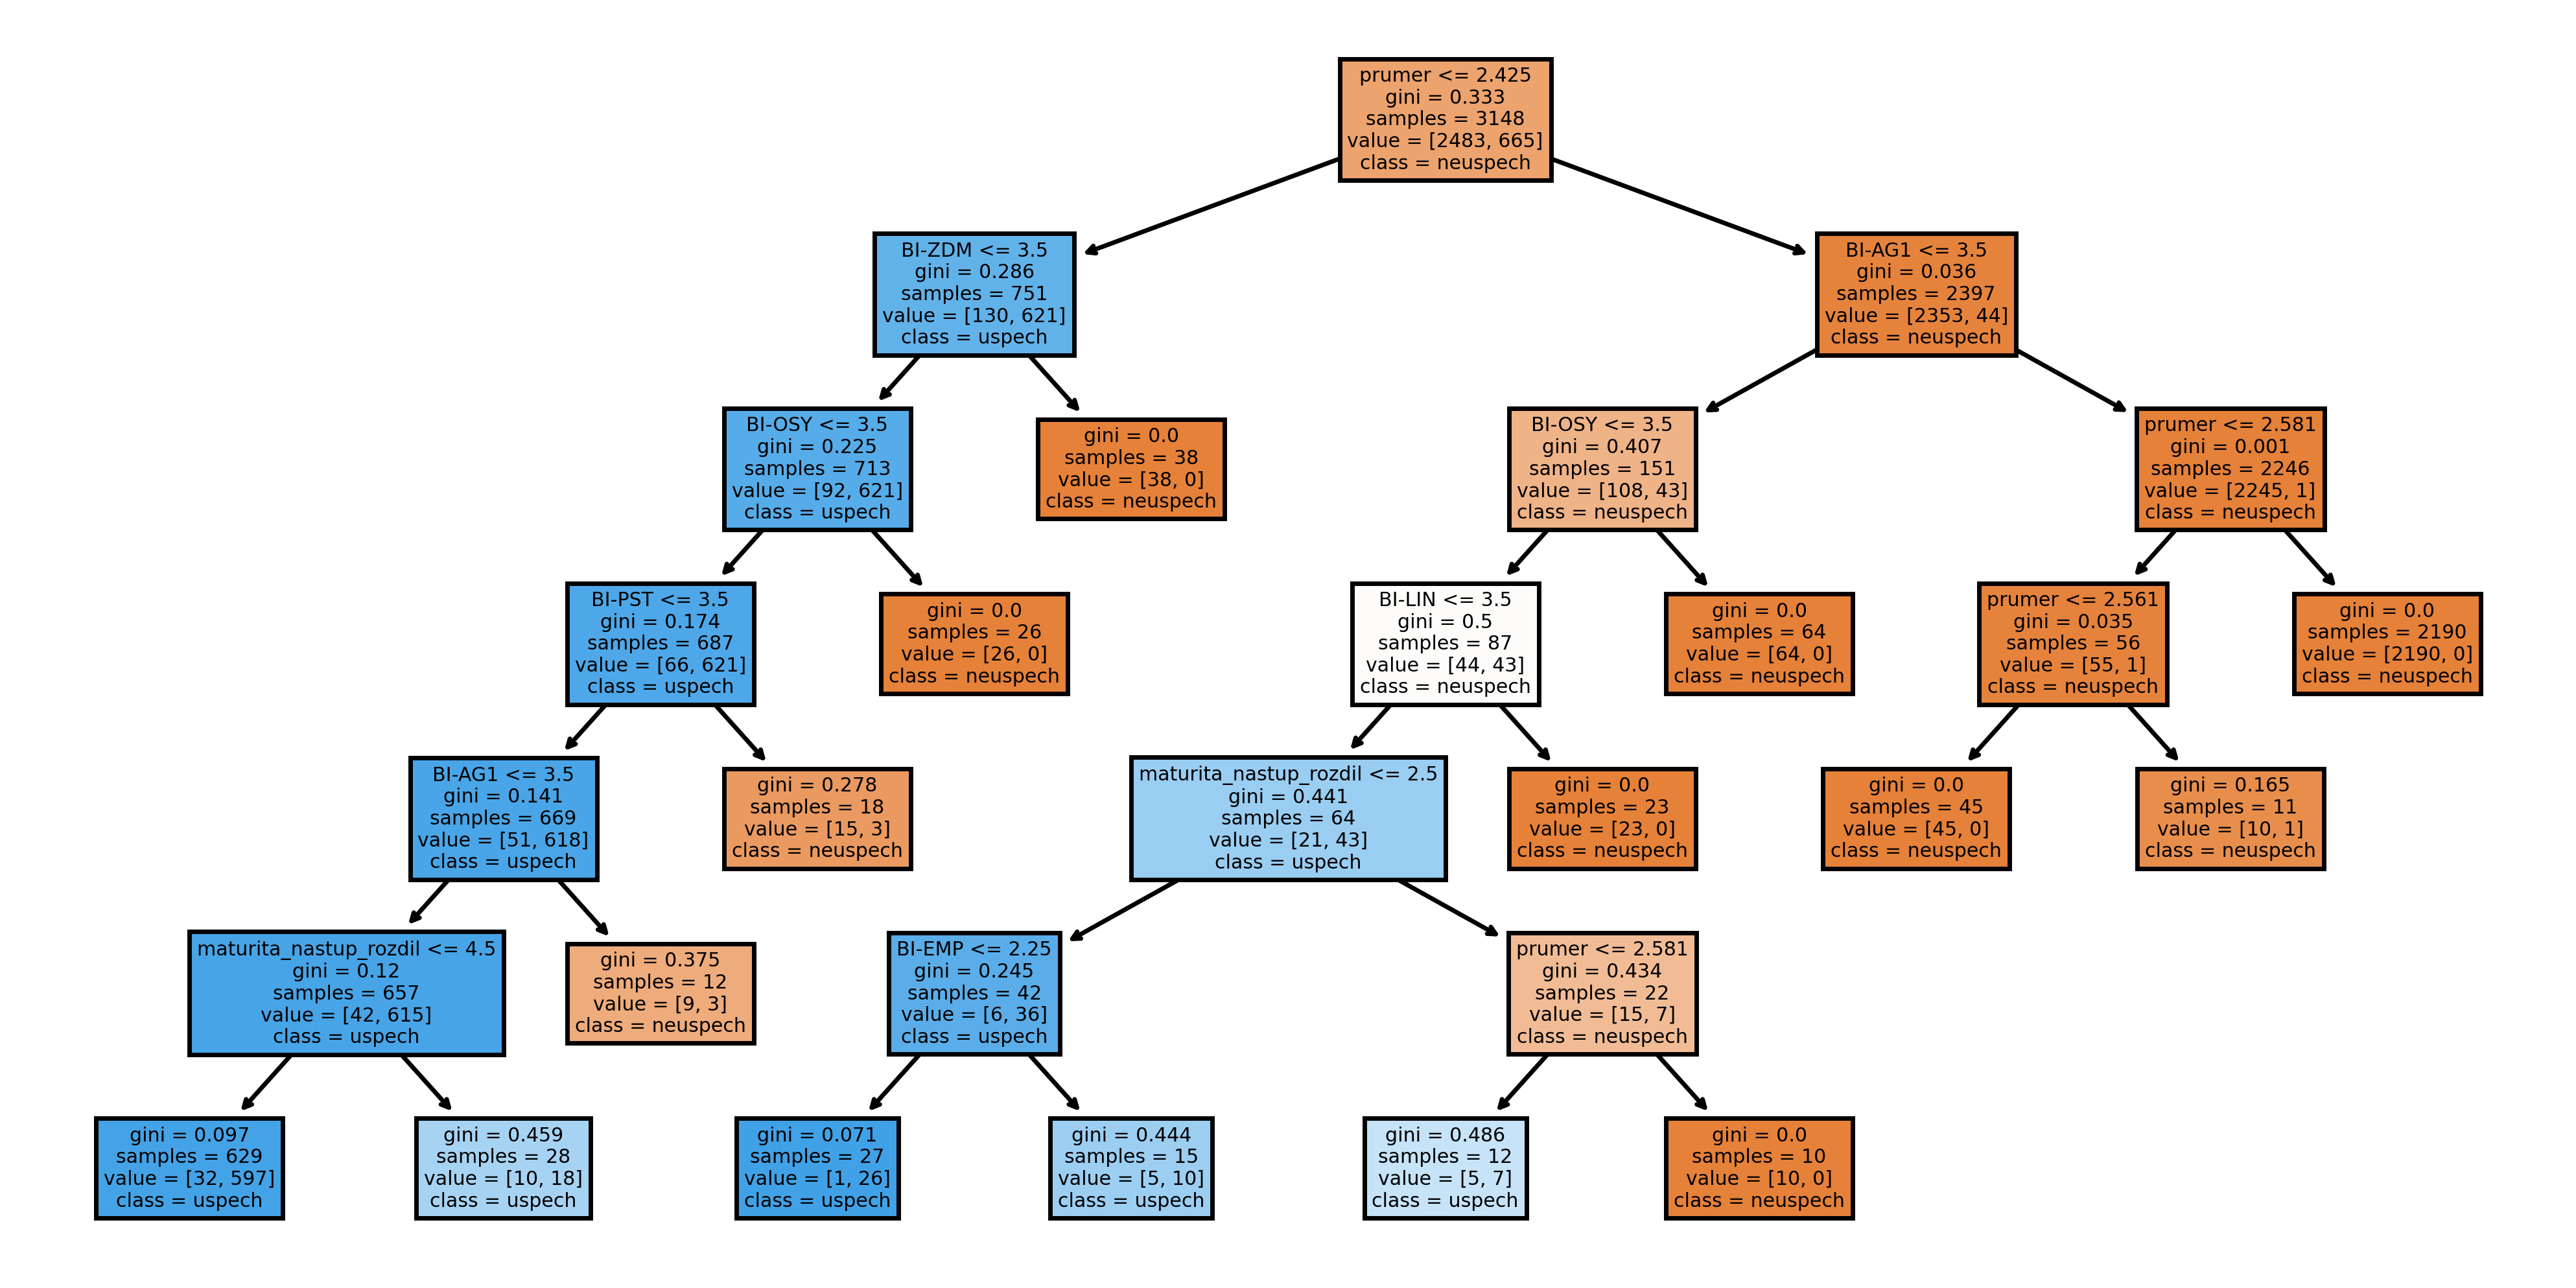

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [27]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [28]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 20}

0.920482 (+/-0.039126) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.928325 (+/-0.034563) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.922799 (+/-0.026360) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.929737 (+/-0.032228) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.929324 (+/-0.021688) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.921295 (+/-0.032565) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.929040 (+/-0.028251) for {'criterion': 'gini', 'max_depth': 2, 'ma

In [29]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.974269
accuracy score (test): 0.984772


In [30]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
20                  prumer            0.205863
11                  BI-AG1            0.147792
12                  BI-AAG            0.134137
13                  BI-ZDM            0.133674
10                  BI-LIN            0.085909
7                   BI-PA2            0.077988
15                  BI-PSI            0.065820
14                  BI-OSY            0.054687
17                  BI-PST            0.048606
19                  BI-EMP            0.027992
6                   BI-ZMA            0.011211
16                  BI-BEZ            0.006153
8                   BI-DBS            0.000169
5                   BI-MLO            0.000000
9                   BI-SAP            0.000000
1                   BI-PA1            0.000000
4                   BI-PS1            0.000000
3                   BI-CAO            0.000000
2                   BI-PAI            0.000000
18                BI-SI1.2            0.000000
0   maturita_nastup_rozdil            0.000000

#### SVM

In [31]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [32]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

0.935508 (+/-0.036072) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.936338 (+/-0.022139) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.935508 (+/-0.036072) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.941006 (+/-0.022219) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.935481 (+/-0.032833) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.947728 (+/-0.023267) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.935481 (+/-0.032833) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.949981 (+/-0.018028) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.936854 (+/-0.031847) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.948708 (+/-0.024020) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.936854 (+/-0.031847) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.947293 (+/-0.020354) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.936439 (+/-0.027197) for {'C': 0.1, 'gamma': 'au

In [33]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.993011
accuracy score (test): 0.986041


#### Adaboost

In [34]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [35]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.7000000000000001, 'n_estimators': 45}

0.917252 (+/-0.026267) for {'learning_rate': 0.1, 'n_estimators': 5}
0.953003 (+/-0.022426) for {'learning_rate': 0.1, 'n_estimators': 10}
0.953902 (+/-0.028764) for {'learning_rate': 0.1, 'n_estimators': 15}
0.957425 (+/-0.020481) for {'learning_rate': 0.1, 'n_estimators': 20}
0.956638 (+/-0.018371) for {'learning_rate': 0.1, 'n_estimators': 25}
0.958060 (+/-0.019532) for {'learning_rate': 0.1, 'n_estimators': 30}
0.961673 (+/-0.014419) for {'learning_rate': 0.1, 'n_estimators': 35}
0.960920 (+/-0.015689) for {'learning_rate': 0.1, 'n_estimators': 40}
0.960930 (+/-0.016203) for {'learning_rate': 0.1, 'n_estimators': 45}
0.944403 (+/-0.027004) for {'learning_rate': 0.2, 'n_estimators': 5}
0.952039 (+/-0.015157) for {'learning_rate': 0.2, 'n_estimators': 10}
0.955452 (+/-0.022483) for {'learning_rate': 0.2, 'n_estimators': 15}
0.957526 (+/-0.023832) for {'learning_rate': 0.2, 'n_estimators': 20}
0.956

In [36]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.989199
accuracy score (test): 0.989848


In [37]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
20                  prumer            0.177778
0   maturita_nastup_rozdil            0.111111
17                  BI-PST            0.088889
15                  BI-PSI            0.066667
3                   BI-CAO            0.066667
14                  BI-OSY            0.066667
10                  BI-LIN            0.044444
13                  BI-ZDM            0.044444
19                  BI-EMP            0.044444
7                   BI-PA2            0.044444
8                   BI-DBS            0.044444
9                   BI-SAP            0.044444
16                  BI-BEZ            0.022222
2                   BI-PAI            0.022222
12                  BI-AAG            0.022222
1                   BI-PA1            0.022222
5                   BI-MLO            0.022222
4                   BI-PS1            0.022222
11                  BI-AG1            0.022222
6                   BI-ZMA            0.000000
18                BI-SI1.2            0.000000

#### Xgboost

In [38]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [39]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 5}

0.957764 (+/-0.017204) for {'eta': 0.1, 'max_depth': 3}
0.964053 (+/-0.008497) for {'eta': 0.1, 'max_depth': 4}
0.964059 (+/-0.005226) for {'eta': 0.1, 'max_depth': 5}
0.961769 (+/-0.005770) for {'eta': 0.1, 'max_depth': 6}
0.964010 (+/-0.005117) for {'eta': 0.1, 'max_depth': 7}
0.958320 (+/-0.011623) for {'eta': 0.2, 'max_depth': 3}
0.957490 (+/-0.005426) for {'eta': 0.2, 'max_depth': 4}
0.959727 (+/-0.013492) for {'eta': 0.2, 'max_depth': 5}
0.958907 (+/-0.006547) for {'eta': 0.2, 'max_depth': 6}
0.961746 (+/-0.010409) for {'eta': 0.2, 'max_depth': 7}
0.953866 (+/-0.017507) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.956030 (+/-0.005997) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.958258 (+/-0.018000) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.961815 (+/-0.012991) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.960327 (+/-0.009089) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.952934 (+/-0.011861)

In [40]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.994917
accuracy score XGBoost (val): 0.989848


In [41]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [42]:
feat_imp

BI-OSY                    74.0
BI-PST                    71.0
BI-ZDM                    66.0
prumer                    63.0
BI-AAG                    56.0
BI-LIN                    56.0
maturita_nastup_rozdil    55.0
BI-AG1                    42.0
BI-PSI                    39.0
BI-SAP                    39.0
BI-PA1                    39.0
BI-PS1                    38.0
BI-DBS                    34.0
BI-EMP                    33.0
BI-PA2                    32.0
BI-ZMA                    26.0
BI-MLO                    21.0
BI-PAI                    18.0
BI-CAO                    17.0
BI-BEZ                    16.0
BI-SI1.2                  16.0
dtype: float64

#### MLP

In [43]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [44]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.993011
accuracy score mlp (val): 0.982234


#### Lineární regrese

In [45]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [46]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.18689353957993501
RMSE reg (test): 0.17353038505678764


#### kNN

In [47]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [48]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

0.924388 (+/-0.026612) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.924388 (+/-0.026612) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.915726 (+/-0.012929) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.915726 (+/-0.012929) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.914835 (+/-0.032393) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.924388 (+/-0.026612) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.906835 (+/-0.017565) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.915726 (+/-0.012929) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.924812 (+/-0.023278) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.924812 (+/-0.023278) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.918667 (+/-0.018905) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.918667 (+/-0.018905) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.92

In [49]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.980305
accuracy score knn (val): 0.975888


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [50]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 0

#### 1. semestr

In [51]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

courses_to_use = courses_1
Xtest_1.loc[:, 'prumer'] = Xtest_1.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První dva semestry

In [52]:
Xtest_2 = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2
Xtest_2.loc[:, 'prumer'] = Xtest_2.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První tři semestry

In [53]:
Xtest_3 = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3
Xtest_3.loc[:, 'prumer'] = Xtest_3.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První čtyři semestry 

In [54]:
Xtest_4 = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4
Xtest_4.loc[:, 'prumer'] = Xtest_4.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Prvních pět semestrů

In [55]:
Xtest_5 = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5
Xtest_5.loc[:, 'prumer'] = Xtest_5.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Všechny semestry bez SI1.2 a EMP

In [56]:
Xtest_6 = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6
Xtest_6.loc[:, 'prumer'] = Xtest_6.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [57]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
    
Xtest_0_mean.loc[:, 'prumer'] = Xtest_0.loc[:, courses[0]:courses[-1]].mean(axis=1)

#### První semestr

In [58]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

courses_to_use = courses_1
Xtest_1_mean['prumer'] = Xtest_1_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První dva semestry

In [59]:
Xtest_2_mean = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2
Xtest_2_mean['prumer'] = Xtest_2_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První tři semestry

In [60]:
Xtest_3_mean = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3
Xtest_3_mean['prumer'] = Xtest_3_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První čtyři semestry 

In [61]:
Xtest_4_mean = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4
Xtest_4_mean['prumer'] = Xtest_4_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Prvních pět semestrů

In [62]:
Xtest_5_mean = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5
Xtest_5_mean['prumer'] = Xtest_5_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Všechny semestry bez SI1.2 a EMP

In [63]:
Xtest_6_mean = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6
Xtest_6_mean['prumer'] = Xtest_6_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

## Výsledky

In [64]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

In [65]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [66]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

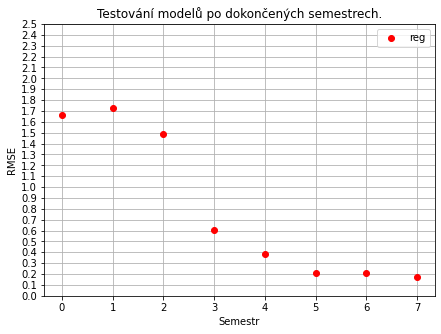

In [67]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [68]:
results_reg

reg
0  1.666
1  1.723
2  1.488
3  0.602
4  0.382
5  0.213
6  0.213
7  0.174

#### Doplněno průměrem

In [69]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

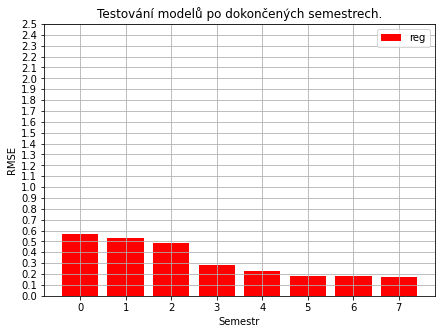

In [70]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [71]:
results_reg_mean

reg
0   0.57
1  0.529
2  0.483
3  0.283
4  0.227
5  0.185
6  0.185
7  0.174

## Ostatní modely
### Měřeno accuracy_score

In [72]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

In [73]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

#### Po doplnění 0

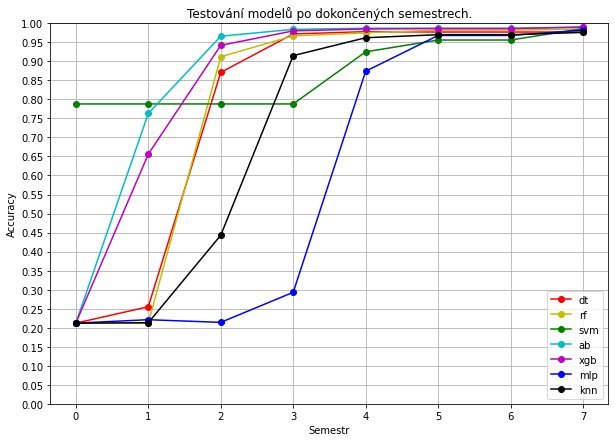

In [74]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

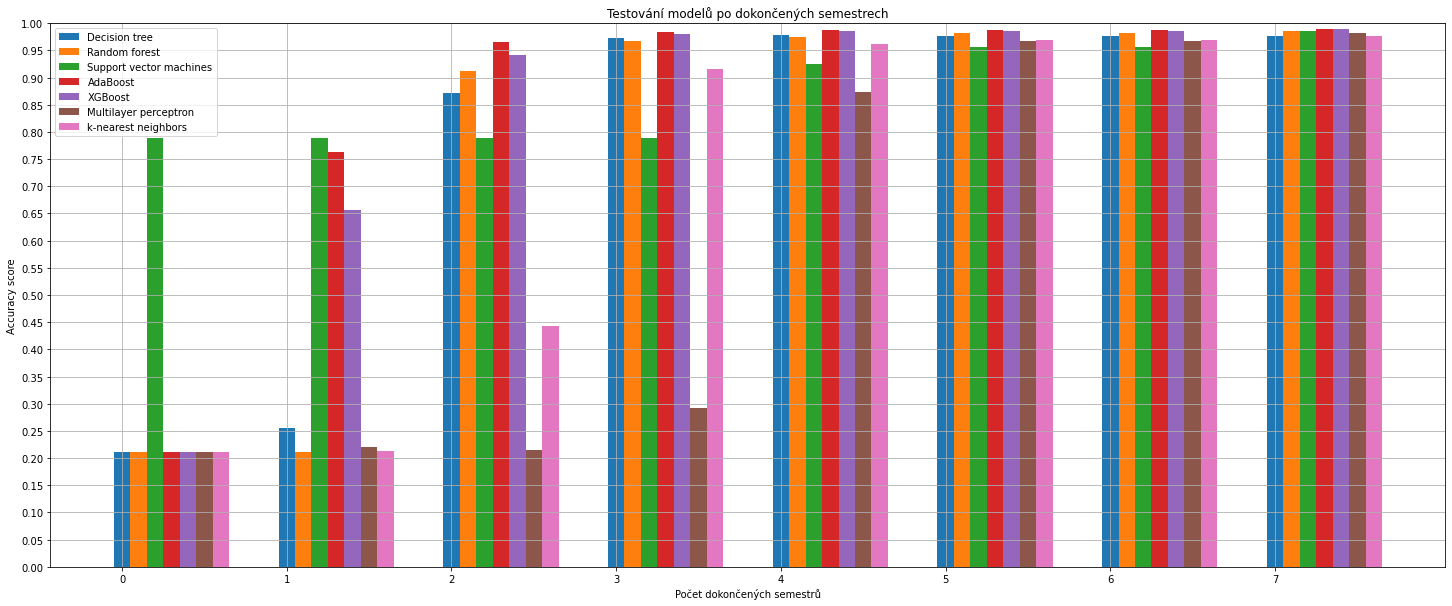

In [75]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [76]:
results

dt     rf    svm     ab    xgb    mlp    knn
0  0.212  0.212  0.788  0.212  0.212  0.212  0.212
1  0.255  0.212  0.788  0.763  0.656  0.221  0.213
2  0.871  0.912  0.788  0.966  0.942  0.214  0.443
3  0.972  0.967  0.788  0.984   0.98  0.293  0.915
4  0.978  0.975  0.925  0.987  0.985  0.874  0.962
5  0.977  0.982  0.956  0.987  0.986  0.968   0.97
6  0.977  0.982  0.956  0.987  0.986  0.968   0.97
7  0.977  0.985  0.986   0.99   0.99  0.982  0.976

#### Po doplněni průměrem

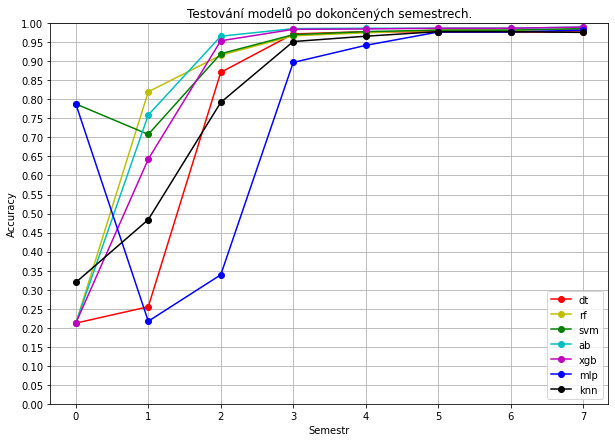

In [77]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [78]:
results_mean

dt     rf    svm     ab    xgb    mlp    knn
0  0.212  0.212  0.788  0.212  0.212  0.788  0.319
1  0.255   0.82  0.708  0.759  0.643  0.217  0.484
2  0.871  0.916   0.92  0.966  0.954  0.339  0.792
3  0.972  0.967   0.97  0.986  0.984  0.897  0.952
4  0.978  0.975  0.978  0.987  0.985  0.942  0.966
5  0.977  0.982  0.982  0.987  0.987  0.977  0.978
6  0.977  0.982  0.982  0.987  0.987  0.977  0.978
7  0.977  0.985  0.986   0.99   0.99  0.982  0.976

### Měřeno f1_score

In [79]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [80]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

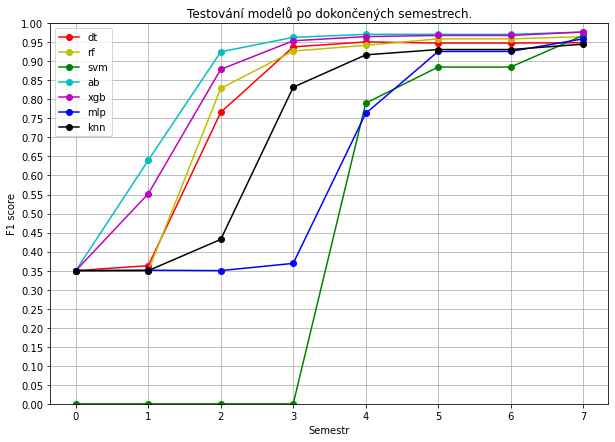

In [81]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [82]:
results_f1

dt     rf    svm     ab    xgb    mlp    knn
0   0.35   0.35      0   0.35   0.35   0.35   0.35
1  0.363   0.35      0   0.64  0.552  0.351   0.35
2  0.766  0.829      0  0.925  0.879   0.35  0.432
3  0.938  0.927      0  0.963  0.954  0.369  0.832
4  0.951  0.942   0.79  0.971  0.965  0.763  0.917
5  0.948  0.959  0.885  0.971  0.968  0.926  0.931
6  0.948  0.959  0.885  0.971  0.968  0.926  0.931
7  0.949  0.965  0.968  0.977  0.977  0.959  0.945

#### Po doplněni průměrem

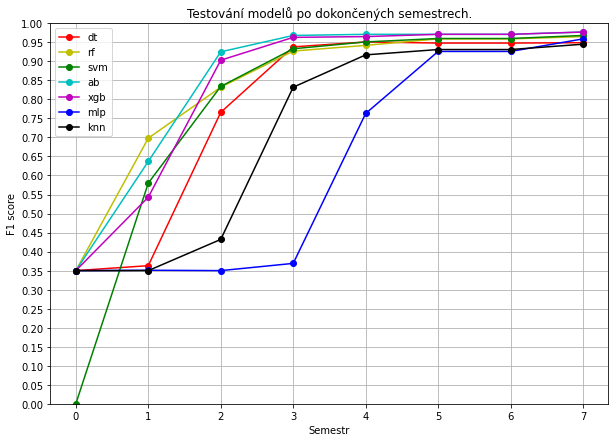

In [83]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [84]:
results_mean_f1

dt     rf    svm     ab    xgb    mlp    knn
0   0.35   0.35      0   0.35   0.35   0.35   0.35
1  0.363  0.698   0.58  0.637  0.543  0.351   0.35
2  0.766  0.832  0.834  0.925  0.903   0.35  0.432
3  0.938  0.927  0.933  0.968  0.963  0.369  0.832
4  0.951  0.942  0.951  0.971  0.965  0.763  0.917
5  0.948  0.959   0.96  0.971  0.971  0.926  0.931
6  0.948  0.959   0.96  0.971  0.971  0.926  0.931
7  0.949  0.965  0.968  0.977  0.977  0.959  0.945